In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gwatpy.mcmc_routines as gmcmc
from corner import corner
import h5py 

In [2]:
N = 100
time = np.linspace(0,N,N)
dn = 2/ (N-1)
sigma = 1
beta = 5

In [3]:
true_data = np.loadtxt("../data/full_data_transdimensional_5_5_1_100.csv")
true_clean_data = np.loadtxt("../data/clean_data_transdimensional_5_5_1_100.csv")

In [4]:
def cheb_fn(P,coeff,x ):
    return np.sum(coeff[:P] * np.cos(np.arange(P)*np.arccos(x)))

In [5]:
data = gmcmc.RJPTMCMC_unpack_file("../data/output_trans.hdf5")
#dim_fixed = [5,6,4,3]
data_fixed_1 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim1.hdf5")
data_fixed_2 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim2.hdf5")
data_fixed_3 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim3.hdf5")
data_fixed_4 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim4.hdf5")

f1 = h5py.File("../data/output_trans_fixed_dim1.hdf5")
f2 = h5py.File("../data/output_trans_fixed_dim2.hdf5")
f3 = h5py.File("../data/output_trans_fixed_dim3.hdf5")
f4 = h5py.File("../data/output_trans_fixed_dim4.hdf5")

evidence1 = f1["MCMC_METADATA"]["EVIDENCE"][0]
evidence2 = f2["MCMC_METADATA"]["EVIDENCE"][0]
evidence3 = f3["MCMC_METADATA"]["EVIDENCE"][0]
evidence4 = f4["MCMC_METADATA"]["EVIDENCE"][0]
print(evidence1,evidence2,evidence3,evidence4)

IL1 = f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL2 = f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL3 = f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL4 = f4["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
ILNUM1 = f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM2 = f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM3 = f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM4 = f4["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
T1 = f1["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T2 = f2["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T3 = f3["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T4 = f4["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]

trim:  0
ac:  23.6
trim:  0
ac:  27.7
trim:  0
ac:  18.4
trim:  0
ac:  14.1
-155.18863877425397 -158.7587850070007 -155.5771963642613 -159.08865285337697


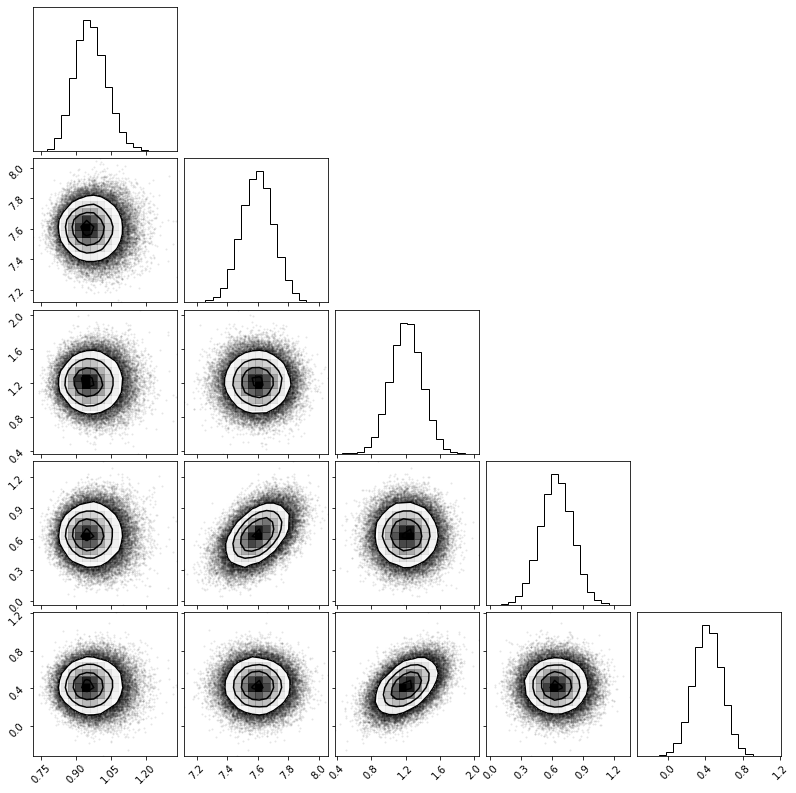

In [6]:
fig = corner(data_fixed_1)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
Bayes factor 5/6 (RJ):  743.177897574124
Bayes factor 5/6 (PTMCMC):  35.521787220361986
Bayes factor 5/4 (RJ):  0.041482775378051
Bayes factor 5/4 (PTMCMC):  1.4748519177517803
Bayes factor 5/3 (RJ):  0.08961957049928344
Bayes factor 5/3 (PTMCMC):  49.40314465358381
Bayes factor 4/3 (RJ):  2.1604044011650716
Bayes factor 4/3 (PTMCMC):  33.49702031705832


(array([0.00000000e+00, 7.51001502e-05, 3.07655515e-01, 6.64660329e-01,
        2.75719551e-02, 3.71000742e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <BarContainer object of 10 artists>)

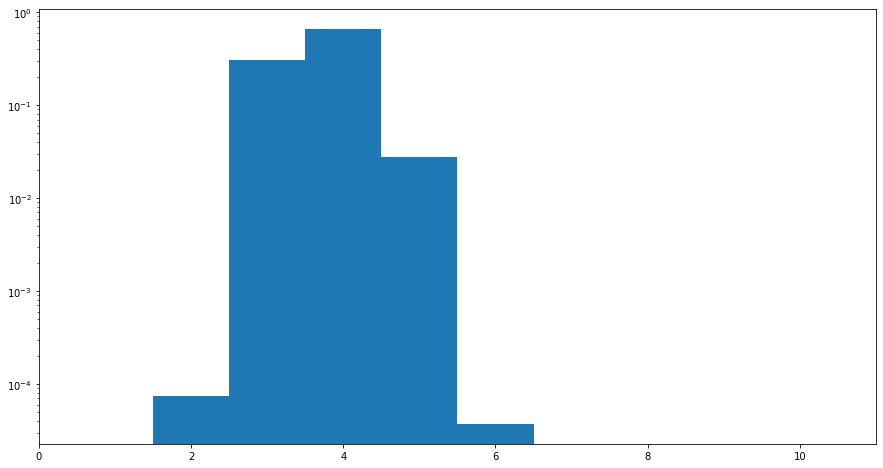

In [6]:
bins = np.linspace(0.5,len(data[1][0])+.5,len(data[1][0])+1)
mids = bins[1:] - .5
print(bins)
dims = np.sum(data[1],axis=1)
print("Bayes factor 5/6 (RJ): ",np.sum(dims == 5) / np.sum(dims==6))
print("Bayes factor 5/6 (PTMCMC): ",np.exp(evidence1 - evidence2))
print("Bayes factor 5/4 (RJ): ",np.sum(dims == 5) / np.sum(dims==4))
print("Bayes factor 5/4 (PTMCMC): ",np.exp(evidence1 - evidence3))
print("Bayes factor 5/3 (RJ): ",np.sum(dims == 5) / np.sum(dims==3))
print("Bayes factor 5/3 (PTMCMC): ",np.exp(evidence1 - evidence4))
print("Bayes factor 4/3 (RJ): ",np.sum(dims == 4) / np.sum(dims==3))
print("Bayes factor 4/3 (PTMCMC): ",np.exp(evidence3 -evidence4))

fig, ax = plt.subplots(figsize=[15,8])
ax.hist(dims,bins=bins,log=True,density=True)

In [12]:
recon = [[cheb_fn(np.sum(data[1][x,1:]), data[0][x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed1 = [[cheb_fn(len(data_fixed_1[x,1:]), data_fixed_1[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed2 = [[cheb_fn(len(data_fixed_2[x,1:]), data_fixed_2[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed3 = [[cheb_fn(len(data_fixed_3[x,1:]), data_fixed_3[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed4 = [[cheb_fn(len(data_fixed_4[x,1:]), data_fixed_4[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]


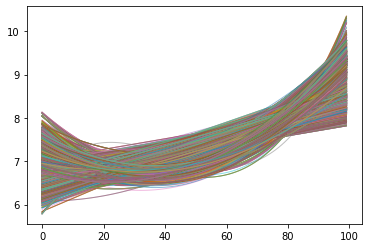

In [13]:
for x in recon:
    plt.plot(x,alpha=.5,linewidth=1)

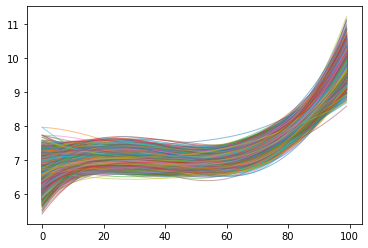

In [14]:
for x in recon_fixed1:
    plt.plot(x,alpha=.5,linewidth=1)

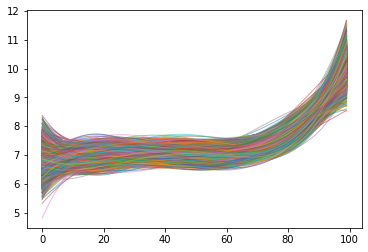

In [15]:
for x in recon_fixed2:
    plt.plot(x,alpha=.5,linewidth=1)

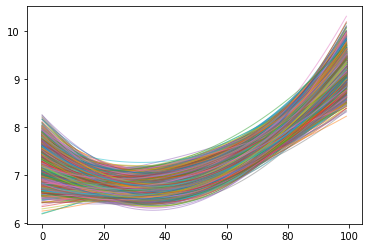

In [16]:
for x in recon_fixed3:
    plt.plot(x,alpha=.5,linewidth=1)

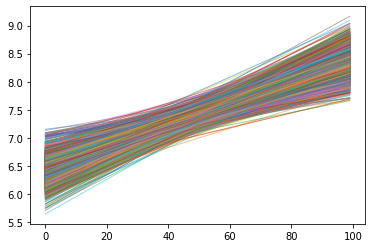

In [17]:
for x in recon_fixed4:
    plt.plot(x,alpha=.5,linewidth=1)

In [18]:
up = np.quantile(recon,.9,axis=0)
down = np.quantile(recon,.1,axis=0)
up_fixed1 = np.quantile(recon_fixed1,.9,axis=0)
down_fixed1 = np.quantile(recon_fixed1,.1,axis=0)
up_fixed2 = np.quantile(recon_fixed2,.9,axis=0)
down_fixed2 = np.quantile(recon_fixed2,.1,axis=0)
up_fixed3 = np.quantile(recon_fixed3,.9,axis=0)
down_fixed3 = np.quantile(recon_fixed3,.1,axis=0)
up_fixed4 = np.quantile(recon_fixed4,.9,axis=0)
down_fixed4 = np.quantile(recon_fixed4,.1,axis=0)

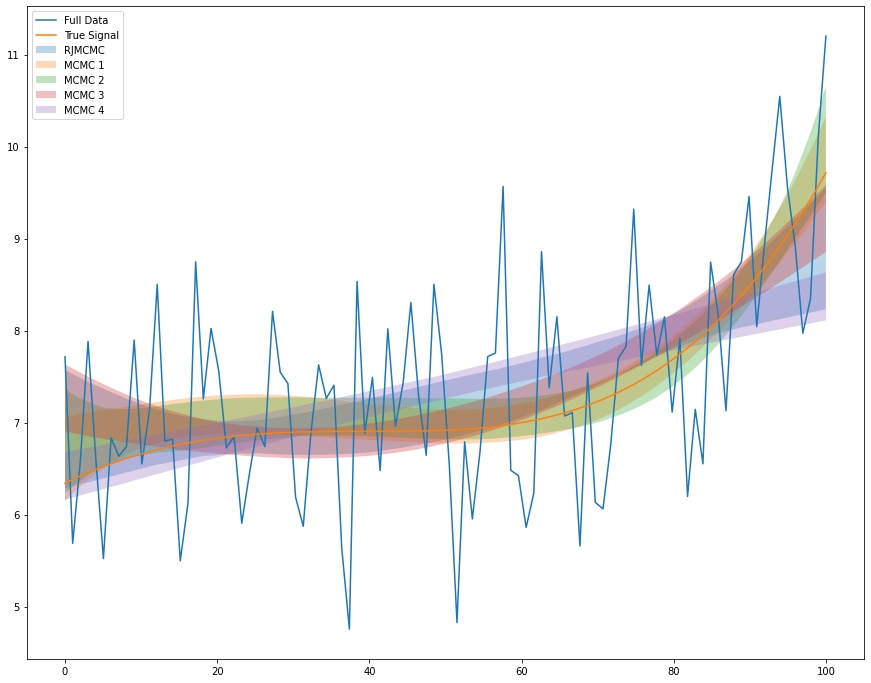

In [29]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[15,12])
ax.plot(time,true_data,label='Full Data')
ax.plot(time,true_clean_data,label="True Signal")
ax.fill_between(time,up,down,alpha=.3,label='RJMCMC')
ax.fill_between(time,up_fixed1,down_fixed1,alpha=.3,label='MCMC 1')
ax.fill_between(time,up_fixed2,down_fixed2,alpha=.3,label='MCMC 2')
ax.fill_between(time,up_fixed3,down_fixed3,alpha=.3,label='MCMC 3')
ax.fill_between(time,up_fixed4,down_fixed4,alpha=.3,label='MCMC 4')

ax.legend()

(array([2.0000e+01, 5.3400e+02, 4.4720e+03, 2.6252e+04, 7.7943e+04,
        9.8803e+04, 5.2658e+04, 1.3661e+04, 1.6240e+03, 1.2300e+02]),
 array([-0.33505013, -0.19079955, -0.04654897,  0.09770162,  0.2419522 ,
         0.38620278,  0.53045336,  0.67470394,  0.81895452,  0.9632051 ,
         1.10745568]),
 <BarContainer object of 10 artists>)

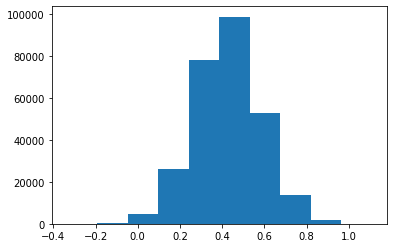

In [39]:
ID = 4
plt.hist(data[0][data[1][:,ID] == 1,ID])

In [17]:
dims = np.sum(data[1],axis=1)

In [44]:
from scipy.integrate import trapz,quad
from scipy.interpolate import interp1d
Ts= [T1,T2,T3,T4]
LLs = [IL1,IL2,IL3,IL4]
lnE = []
for ct in np.arange(len([IL1,IL2,IL3,IL4])):
    
    betas = np.flip(1/Ts[ct][:len(LLs[ct])-1])
    LL = np.flip(LLs[ct][:-1])
    func1 = interp1d(betas,LL)
    evidence = quad(func1, betas[0],betas[-1])[0]
    lnE.append(evidence)
print(lnE)
print(evidence1,evidence2,evidence3,evidence4)

[-152.03195133982433, -154.8103439193832, -152.26225220097646, -156.2616345244688]
-155.18863877425397 -158.7587850070007 -155.5771963642613 -159.08865285337697


<ipython-input-44-b7c3a50900ac>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  evidence = quad(func1, betas[0],betas[-1])[0]
<ipython-input-44-b7c3a50900ac>:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  evidence = quad(func1, betas[0],betas[-1])[0]


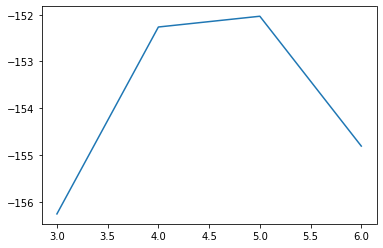

In [43]:
plt.plot(mids[2:6],[lnE[3],lnE[2],lnE[0],lnE[1]])

In [10]:
print("Bayes factor 5/6 (RJ): ",np.sum(dims == 5) / np.sum(dims==6))
print("Bayes factor 5/6 (PTMCMC): ",np.exp(lnE[0] - lnE[1]))
print("Bayes factor 5/4 (RJ): ",np.sum(dims == 5) / np.sum(dims==4))
print("Bayes factor 5/4 (PTMCMC): ",np.exp(lnE[0] - lnE[2]))
print("Bayes factor 5/3 (RJ): ",np.sum(dims == 5) / np.sum(dims==3))
print("Bayes factor 5/3 (PTMCMC): ",np.exp(lnE[0] - lnE[3]))
print("Bayes factor 4/3 (RJ): ",np.sum(dims == 4) / np.sum(dims==3))
print("Bayes factor 4/3 (PTMCMC): ",np.exp(lnE[2] -lnE[3]))

Bayes factor 5/6 (RJ):  743.177897574124
Bayes factor 5/6 (PTMCMC):  65.37619929304094
Bayes factor 5/4 (RJ):  0.041482775378051
Bayes factor 5/4 (PTMCMC):  0.6182116997467432
Bayes factor 5/3 (RJ):  0.08961957049928344
Bayes factor 5/3 (PTMCMC):  10.475851135664204
Bayes factor 4/3 (RJ):  2.1604044011650716
Bayes factor 4/3 (PTMCMC):  16.945410673974216


[1.00000000e+00 5.13172459e-01 2.84667951e-01 1.62613194e-01
 9.67703267e-02 6.85248087e-02 4.93508077e-02 3.02998313e-02
 8.61588246e-03 1.00000000e-04]


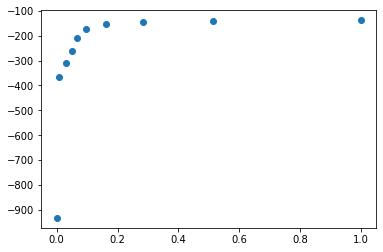

In [11]:
plt.scatter(1/T1[:len(IL1[:])],IL1[:])
print(1/T1[:len(IL1[:])])
#plt.plot(IL2[:-1])
#plt.plot(IL3[:-1])
#plt.plot(IL4[:-1])

In [30]:
print(ILNUM1)
print(ILNUM2)
print(ILNUM3)
print(ILNUM4)
print(T1)

[1599920 1600000 1600000 1600000 1600000 1600000 1600000 1600000 1600000
 1600000]
[1799910 1800000 1800000 1800000 1800000 1800000 1800000 1800000 1800000
 1800000]
[1199940 1200000 1200000 1200000 1200000 1200000 1200000 1200000 1200000
 1200000]
[ 999950 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000]
[1.00000000e+00 1.92939590e+00 3.61675447e+00 6.38099055e+00
 1.00635231e+01 1.47012668e+01 2.03853688e+01 3.49737960e+01
 1.48569594e+02 1.00000000e+14 1.00000000e+00 1.92939590e+00
 3.61675447e+00 6.38099055e+00 1.00635231e+01 1.47012668e+01
 2.03853688e+01 3.49737960e+01 1.48569594e+02 1.00000000e+14
 1.00000000e+00 1.92939590e+00 3.61675447e+00 6.38099055e+00
 1.00635231e+01 1.47012668e+01 2.03853688e+01 3.49737960e+01
 1.48569594e+02 1.00000000e+14 1.00000000e+00 1.92939590e+00
 3.61675447e+00 6.38099055e+00 1.00635231e+01 1.47012668e+01
 2.03853688e+01 3.49737960e+01 1.48569594e+02 1.00000000e+14
 1.00000000e+00 1.92939590e+00 3.61675447e+00 6.38099055e+